Exploratory Data Analysis (EDA) on Retail Sales Data :-

Dataset Description:-

* Sales Performance Analysis – Track revenue trends, top-selling categories, and seasonal patterns.
* Customer Insights – Understand customer demographics (age, gender) and their buying behavior.
* Product Analysis – Identify popular products, price–demand relationships, and category contributions.
* Revenue Growth Opportunities – Find high-value customers, key revenue drivers, and forecast future sales.

Key Concepts and Challenges:-
* Data Loading and Cleaning: Load the retail sales dataset.
* Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
* Time Series Analysis: Analyze sales trends over time using time series techniques.
* Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
* Visualization: Present insights through bar charts, line plots, and heatmaps.
* Recommendations: Provide actionable recommendations based on the EDA.

In [5]:
# 1. Data Loading and Cleaning
import pandas as pd

# Load datasets
df1 = pd.read_csv("E:/OIBSIP/Task -1/retail_sales_dataset.csv")
df2 = pd.read_csv("E:/OIBSIP/Task -1/menu.csv")

# Display basic info
print(df1.info())
print(df1.head())

# Check for missing values
print(df1.isnull().sum())

# Drop duplicates
df1 = df1.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [6]:
#2. Descriptive Statistics
#Calculate mean, median, mode, standard deviation of relevant columns.

print(df1.describe())  # Gives mean, std, min, max, etc.
# For mode (if needed)
print(df1.mode())


       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
     Transaction ID        Date Customer ID  Gender   Age Product Category  \
0                 1  2023-05-16     CUST001  Female  43.0         Clothing   
1                 2         NaN     CUST002     NaN  64.0              NaN   
2                 3         NaN     CUST003     NaN   NaN              Na

date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: total_amount, Length: 345, dtype: int64


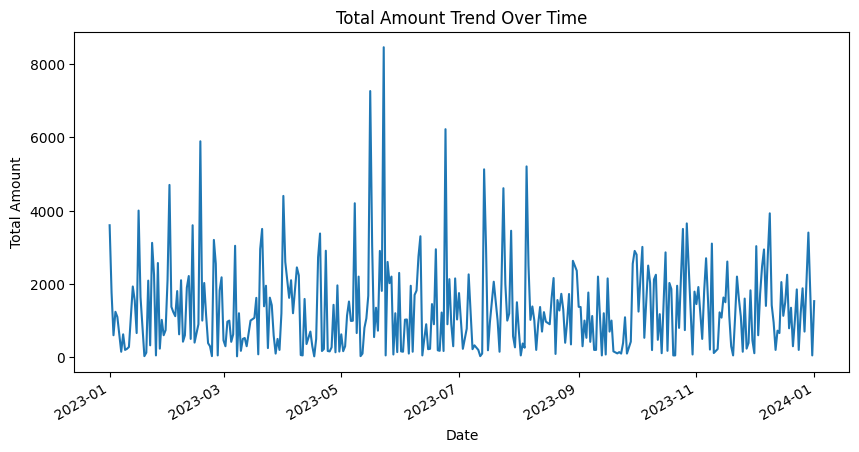

In [7]:
#3. Time Series Analysis
# Analyze sales trends over time. Ensure date columns are datetime type.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv("E:/OIBSIP/Task -1/retail_sales_dataset.csv")

# Clean and standardize column names
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Group by date and sum the 'total_amount' column (instead of 'Sales')
sales_trend = df1.groupby('date')['total_amount'].sum()
print(sales_trend)

# Plotting sales trend
plt.figure(figsize=(10,5))
sales_trend.plot()
plt.title('Total Amount Trend Over Time')
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.show()


In [8]:
#4. Customer and Product Analysis
#Analyze customer demographics and purchasing behavior.

import pandas as pd
# Grouping by gender to get average total amount spent and count of transactions
customer_gender_analysis = df1.groupby('gender').agg(
    average_spent=('total_amount', 'mean'),
    transaction_count=('transaction_id', 'count')
).reset_index()
print("Customer Analysis by Gender:")
print(customer_gender_analysis)

# Create age bins and labels
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age_group categorical column
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age_group with observed=False to avoid FutureWarning
customer_age_analysis = df1.groupby('age_group', observed=False).agg(
    average_spent=('total_amount', 'mean'),
    transaction_count=('transaction_id', 'count')
).reset_index()

print(customer_age_analysis)
# Top 10 product categories by total sales amount
top_product_categories = (
    df1.groupby('product_category')['total_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print("\nTop 10 Product Categories by Total Sales:")
print(top_product_categories)

# Average purchase quantity per product category
avg_quantity_per_category = (
    df1.groupby('product_category')['quantity']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
print("\nAverage Quantity Purchased per Product Category:")
print(avg_quantity_per_category)


Customer Analysis by Gender:
   gender  average_spent  transaction_count
0  Female     456.549020                510
1    Male     455.428571                490
  age_group  average_spent  transaction_count
0       <18            NaN                  0
1     18-24     501.006711                149
2     25-34     478.275862                203
3     35-44     467.801932                207
4     45-54     432.155556                225
5     55-64     417.546296                216
6       65+            NaN                  0

Top 10 Product Categories by Total Sales:
  product_category  total_amount
0      Electronics        156905
1         Clothing        155580
2           Beauty        143515

Average Quantity Purchased per Product Category:
  product_category  quantity
0         Clothing  2.547009
1           Beauty  2.511401
2      Electronics  2.482456


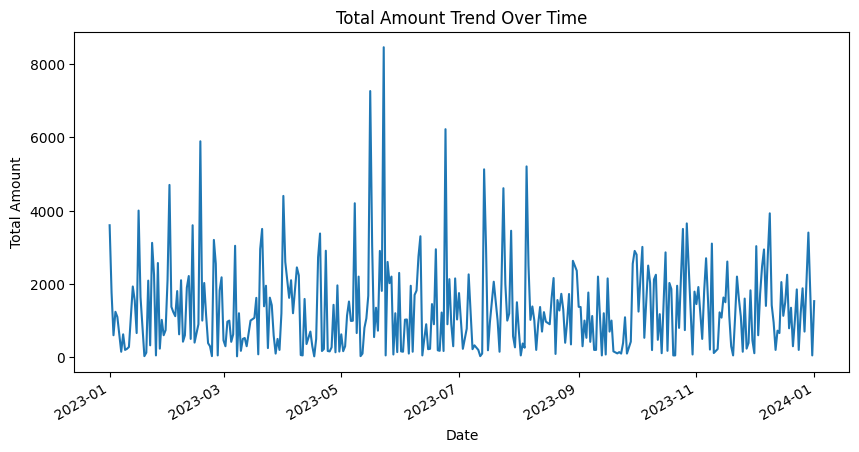

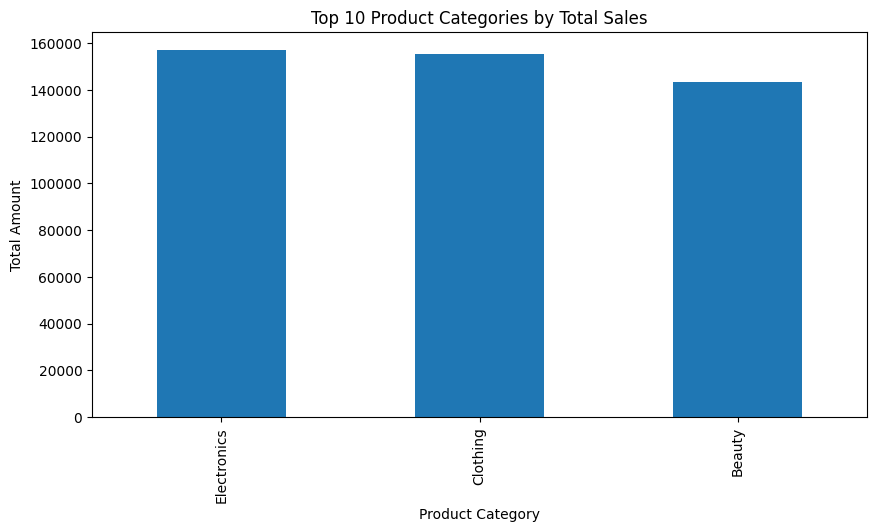

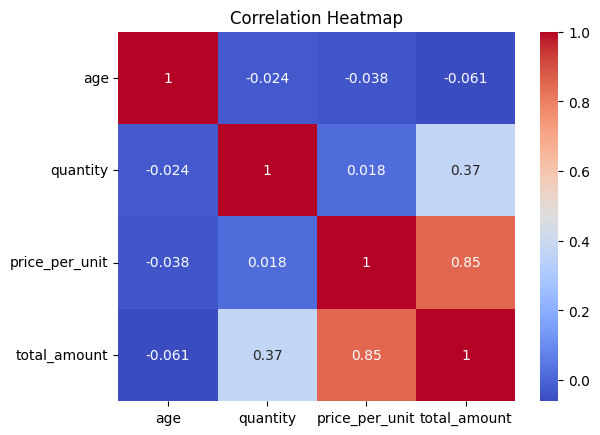

In [9]:
#5. Visualization
#Create bar charts, line plots, heatmaps for insights

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure these steps are already done
# df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')
# df1['date'] = pd.to_datetime(df1['date'])

# 1. Calculate sales_trend (use total_amount, not sales)
sales_trend = df1.groupby('date')['total_amount'].sum()

plt.figure(figsize=(10,5))
sales_trend.plot()
plt.title('Total Amount Trend Over Time')
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.show()

# 2. Top products (use product_category and total_amount)z
top_products = (
    df1.groupby('product_category')['total_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Product Categories by Total Sales')
plt.ylabel('Total Amount')
plt.xlabel('Product Category')
plt.show()

# 3. Correlation heatmap (use correct numerical columns)
numeric_cols = ['age', 'quantity', 'price_per_unit', 'total_amount']
sns.heatmap(df1[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
Recommendation :- "Focus marketing on top-performing products and customer segments identified. Address the sales dip in [Month/Year] and optimize inventory accordingly.”